In [22]:
%matplotlib notebook
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [23]:
brain_mri = nib.load(
    "C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = brain_mri.get_fdata()

In [24]:
affine = brain_mri.affine
shape = brain_mri.shape

In [25]:
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [26]:
shape

(256, 256, 150)

In [27]:
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [28]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

<IPython.core.display.Javascript object>


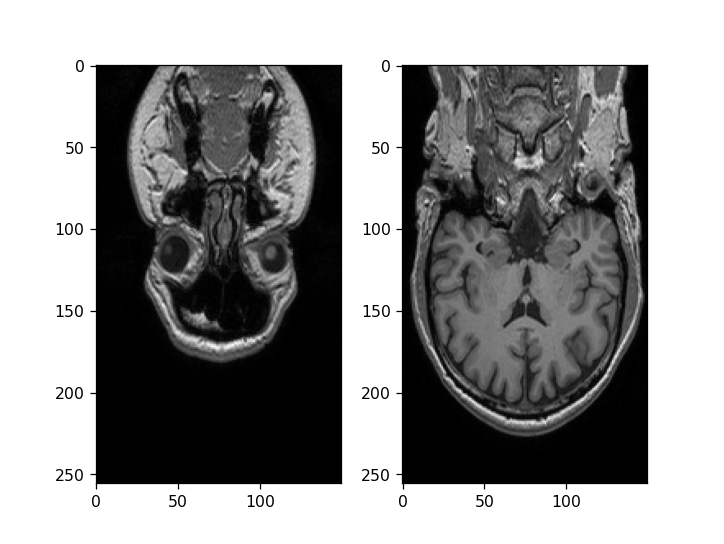

In [29]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[40, :, :], cmap="gray")
axis[1].imshow(brain_mri_data[120, :, :], cmap="gray")


<IPython.core.display.Javascript object>


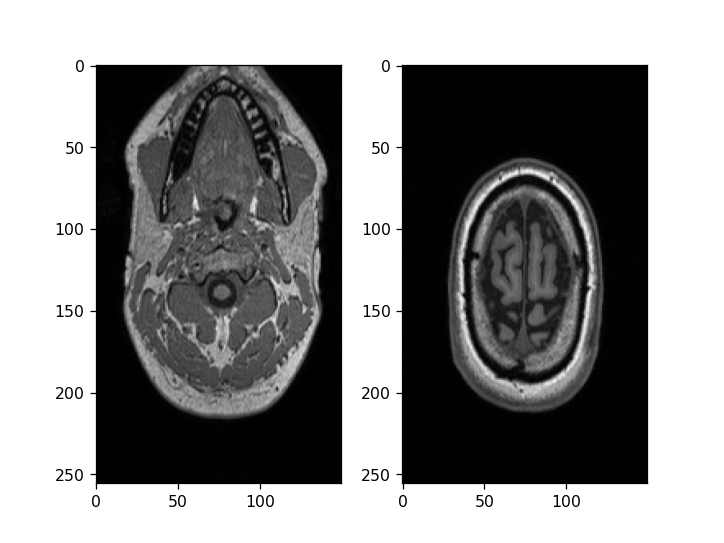

In [30]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,30, :], cmap="gray") #slide #30
axis[1].imshow(brain_mri_data[:,200, :], cmap="gray") #slide #200


<IPython.core.display.Javascript object>


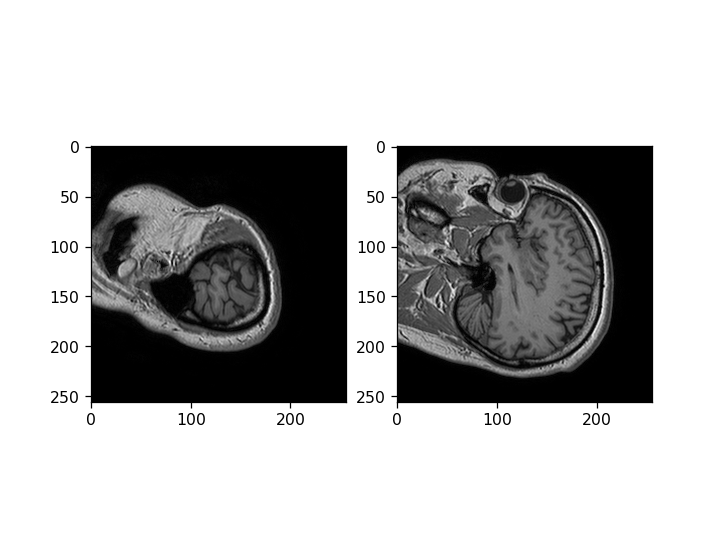

In [31]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 20], cmap="gray")
axis[1].imshow(brain_mri_data[:, :, 45], cmap="gray")


In [35]:
voxel_coord = np.array((0, 0, 0, 1))
physical_coord0 = affine @ voxel_coord  # @ is a shortcut for matrix multiplication in numpy
print(physical_coord0)

[ -90.67985535  102.82944489 -114.82378387    1.        ]


In [37]:
affine[:,3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [38]:
voxel_coord_manual = np.array((0, 0, 0))
physical_coord_manual = affine[:3, :3] @ voxel_coord_manual
physical_coord_manual = physical_coord_manual + affine[:3,3]
print(physical_coord_manual)

[ -90.67985535  102.82944489 -114.82378387]


In [39]:
voxel_coords = (np.linalg.inv(affine) @ physical_coord0).round()
print(voxel_coords)

[0. 0. 0. 1.]


# Resampling

In [42]:
brain_mri_canonical = nib.as_closest_canonical(brain_mri)
brain_mri_canonical_data = brain_mri_canonical.get_fdata()

In [46]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [47]:
import nibabel.processing

In [48]:
voxel_size = (2, 2, 2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [49]:
print(brain_mri.shape)
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(256, 256, 150)
(128, 128, 100)
(2.0, 2.0, 2.0)


In [43]:
canonical_affine = brain_mri_canonical.affine
print(affine)
print("----")
print(canonical_affine)
print(nib.aff2axcodes(canonical_affine))

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
----
[[ 1.19975281e+00 -1.89821944e-02 -2.72075552e-03 -8.58393958e+01]
 [ 2.45456006e-02  9.27821696e-01  1.32986516e-01 -1.33765088e+02]
 [ 5.71511449e-11 -1.33014351e-01  9.28015888e-01 -8.09051243e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('R', 'A', 'S')


<IPython.core.display.Javascript object>


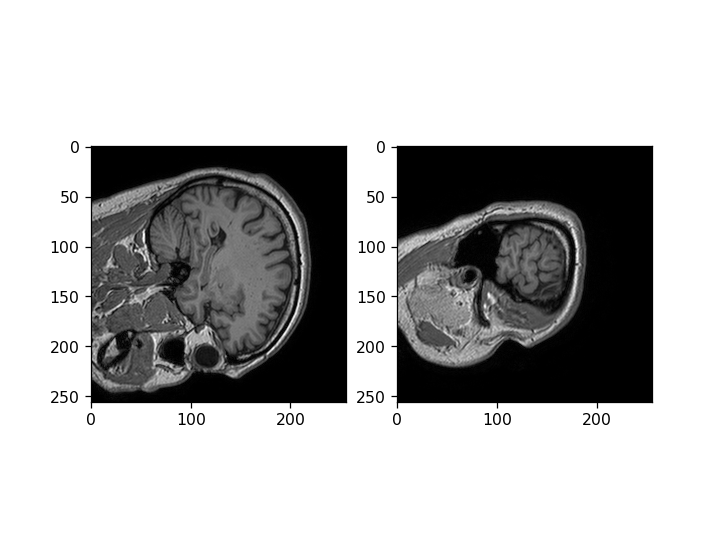

In [44]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_canonical_data[50, :, :], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[130, :, :], cmap="gray")


<IPython.core.display.Javascript object>


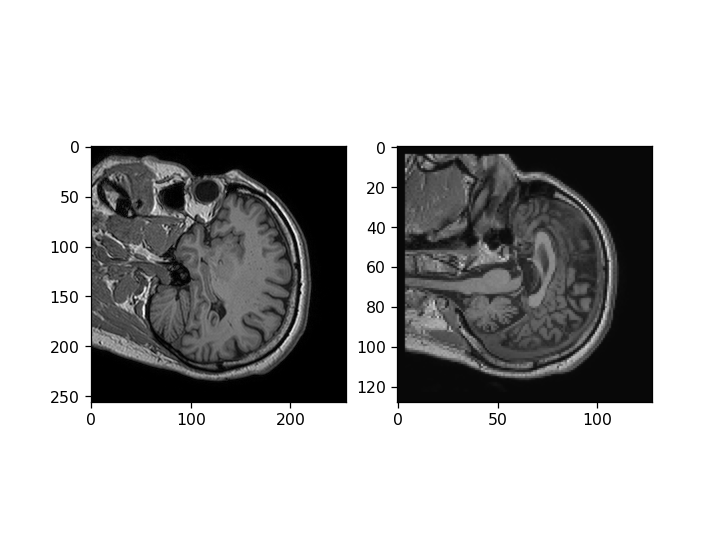

In [50]:
IDX = 50
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:,:,IDX], cmap="gray")
axis[1].imshow(brain_mri_resized_data[:,:,IDX], cmap="gray")

# Normalization and standardizatio

In [51]:
lung_ct = nib.load(
    "C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/03-Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [52]:
lung_ct_data_standardized = lung_ct_data / 3071

<IPython.core.display.Javascript object>


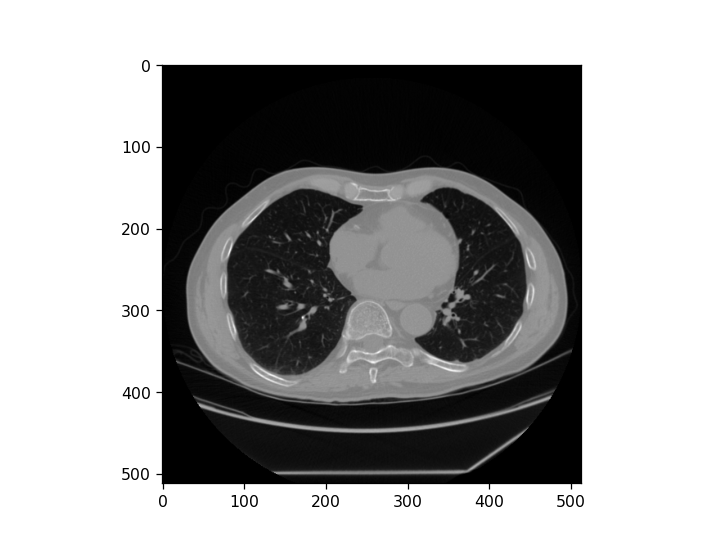

In [53]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_standardized[:,:,50]), cmap="gray")

<IPython.core.display.Javascript object>


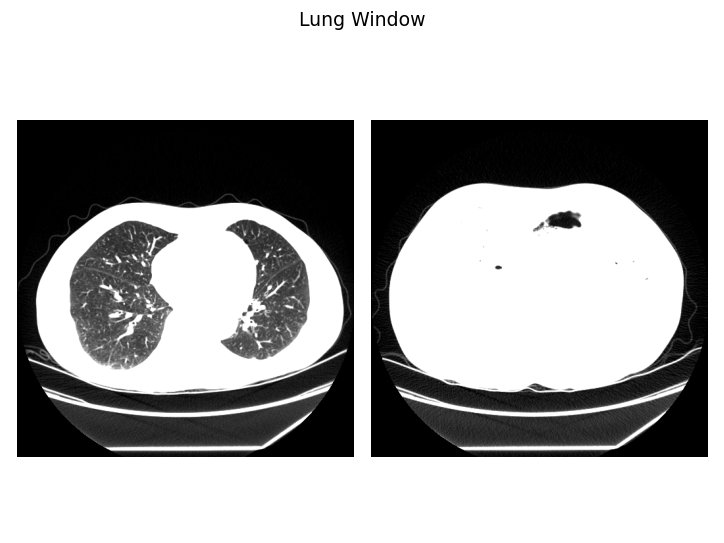

In [54]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500) #smaller than -1000 larger than -500

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_lung_window[:,:,5]), cmap="gray")
axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Lung Window")
plt.tight_layout()
plt.savefig("lung_window.png", bbox_inches="tight")

<IPython.core.display.Javascript object>


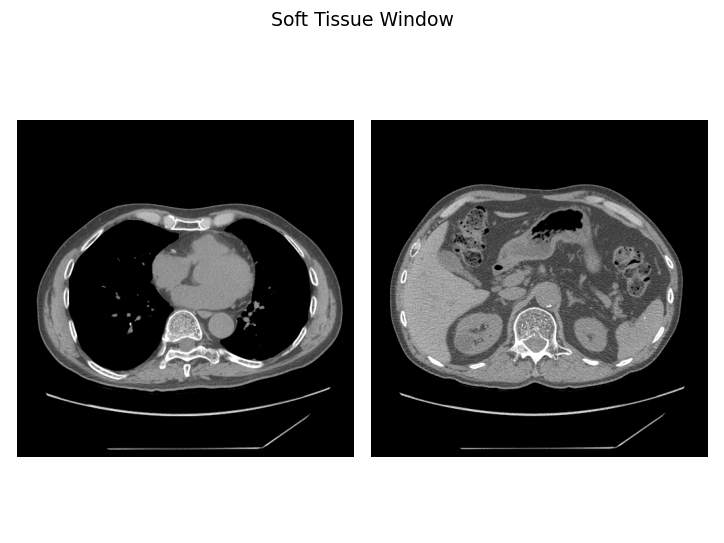

In [55]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,5]), cmap="gray")

axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Soft Tissue Window")
plt.tight_layout()
plt.savefig("tissue_window.png", bbox_inches="tight")


In [56]:
cardiac_mri = nib.load(
    "C:/Users/Owner/Downloads/Udemy/Pytorch/03-Data-Formats/03-Data-Formats/03-Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [58]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

<IPython.core.display.Javascript object>


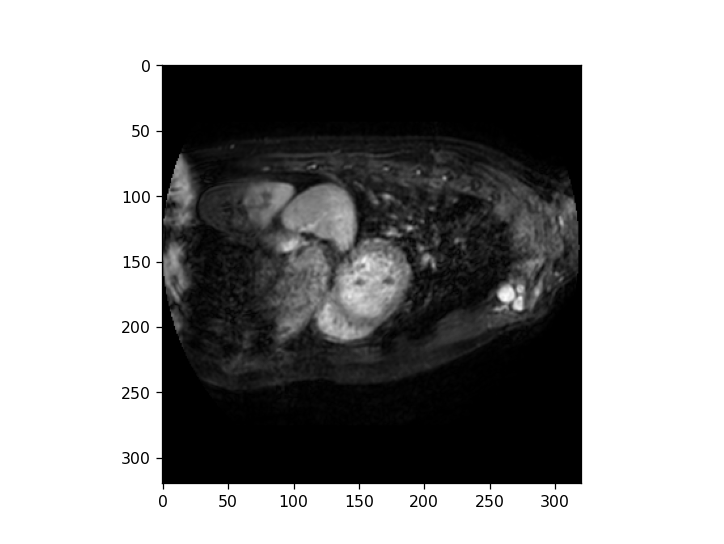

In [59]:
plt.figure()
plt.imshow(cardiac_mri_standardized[:,:,30], cmap="gray")